<a href="https://colab.research.google.com/github/Armin-Abdollahi/Bone-Age-Estimation/blob/main/Bone_Age_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression task for bone age estimation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Label.csv'
labels = pd.read_csv(labels_path)

In [4]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')

labels.head()

,Case ID,Bone Age,Male,Location
0,1.jpg,0,False,Asian
1,2.jpg,0,False,Asian
2,3.jpg,0,False,Asian
3,4.jpg,0,False,Asian
4,5.jpg,0,False,Asian


In [5]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [6]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [7]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames.
Found 1478 validated image filenames.


In [8]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Linear activation for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10
184/184 [==============================] - 2186s 12s/step - loss: 13.7862 - mae: 2.5479 - val_loss: 4.7875 - val_mae: 1.7127
Epoch 2/10
184/184 [==============================] - 323s 2s/step - loss: 5.3079 - mae: 1.7565 - val_loss: 3.9419 - val_mae: 1.5397
Epoch 3/10
184/184 [==============================] - 338s 2s/step - loss: 4.8130 - mae: 1.6668 - val_loss: 4.0213 - val_mae: 1.6230
Epoch 4/10
184/184 [==============================] - 313s 2s/step - loss: 4.0725 - mae: 1.5189 - val_loss: 4.2755 - val_mae: 1.6267
Epoch 5/10
184/184 [==============================] - 343s 2s/step - loss: 3.8990 - mae: 1.4805 - val_loss: 5.7070 - val_mae: 1.7483
Epoch 6/10
184/184 [==============================] - 318s 2s/step - loss: 3.3582 - mae: 1.3772 - val_loss: 3.4978 - val_mae: 1.4331
Epoch 7/10
184/184 [==============================] - 356s 2s/step - loss: 3.1712 - mae: 1.3231 - val_loss: 3.6373 - val_mae: 1.4481
Epoch 8/10
184/184 [==============================] - 284s 2s/step

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=18
)

Epoch 1/18


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 3813s 20s/step - accuracy: 0.0479 - loss: 31.5763 - mae: 3.9073 - val_accuracy: 0.0679 - val_loss: 4.9951 - val_mae: 1.8162
Epoch 2/18
  1/184 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.0000e+00 - loss: 7.3064 - mae: 2.1423

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


184/184 ━━━━━━━━━━━━━━━━━━━━ 55s 300ms/step - accuracy: 0.0000e+00 - loss: 7.3064 - mae: 2.1423 - val_accuracy: 0.0000e+00 - val_loss: 6.9561 - val_mae: 2.2730
Epoch 3/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.0584 - loss: 5.2209 - mae: 1.7253 - val_accuracy: 0.0693 - val_loss: 4.2163 - val_mae: 1.6184
Epoch 4/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.0000e+00 - loss: 5.4577 - mae: 1.8320 - val_accuracy: 0.0000e+00 - val_loss: 1.2604 - val_mae: 0.9883
Epoch 5/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.0601 - loss: 4.6841 - mae: 1.6229 - val_accuracy: 0.0822 - val_loss: 4.0067 - val_mae: 1.5198
Epoch 6/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.0312 - loss: 7.2963 - mae: 2.0248 - val_accuracy: 0.1667 - val_loss: 3.2421 - val_mae: 1.5467
Epoch 7/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.0572 - loss: 4.2753 - mae: 1.5673 - val_accuracy: 0.0876 - val_loss: 3.6844 - val_mae: 1.4789
Epoch 8/18
184/184 ━━━━━━

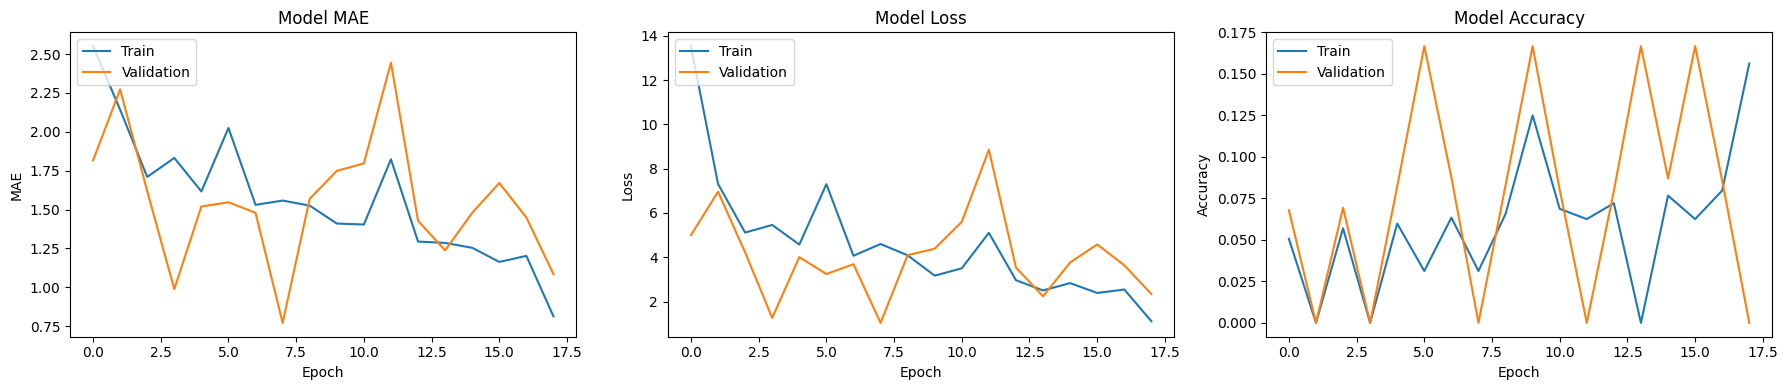

In [11]:
# Plot training & validation MAE values
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [12]:
# Save the model
model.save('/content/drive/MyDrive/bone_age_cnn_model.h5')

# Deep Convolutional Features with Fast Extreme Learning Machine (ELM)

Refrence Paper:
https://www.researchgate.net/publication/358591058_Bone_Age_Assessment_Based_on_Deep_Convolutional_Features_and_Fast_Extreme_Learning_Machine_Algorithm

# Fully Automated Deep Learning System:

Refrence Papper:
http://edgeservices.bing.com/edgesvc/redirect?url=https%3A%2F%2Fscholar.harvard.edu%2Ffiles%2Fhklee%2Ffiles%2Fjdi17_boneage.pdf&hash=0ed9JebJvq2zmnjql2kh7MtsT4vAwV4W%2F%2BPV%2FeEuxd8%3D&key=psc-underside&usparams=cvid%3A51D%7CBingProd%7C1883ECEC16E07610DC636789175D56DD8473173A7DA9978BE54E3995D06032C7%5Ertone%3ABalanced